<a href="https://colab.research.google.com/github/armanalam6342/Credit-Card-Default-Prediction/blob/main/Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##<b> Import Modules

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# import evalution matrices
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report,roc_auc_score,roc_curve, auc
# import Gridsearch cv & Randomsearch cv
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


#Importing Models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
!pip install xgboost
from xgboost import XGBClassifier

In [ ]:
# install lime and Shap
!pip install lime
!pip install shap
!pip install eli5

     |████████████████████████████████| 275 kB 26.6 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=22aad63bd365bcf6ae2fd7cb800c090cdcc3dcd92ab379cde63f64093fe4bb04
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime
     |████████████████████████████████| 371 kB 31.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shap: filename=shap-0.40.0-cp37-cp37m-linux_x86_64.whl size=509240 sha256=fc7e1f3707117011bc6c8d967d9ebb41827a5bdfa7e7f50a18314690edfe15f1
  Stored in directory: /root/.cache/pip/wheels/ec/35/84/e304841ac4b910bc95fe9a6e5302eb2507b4333728851dcbfb
Successfully built shap
     |████████████████████████████████| 106 kB 42.0 MB/s 


In [ ]:
import lime
from lime import lime_tabular
import eli5 as eli
import shap

In [ ]:
!pip install dtreeviz

     |████████████████████████████████| 62 kB 864 kB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3.2-py3-none-any.whl size=67936 sha256=64ca2d3f4aaa7e503bc8a9b4be3bf820b73db02e6b415169c57ca00f4fcb52ef
  Stored in directory: /root/.cache/pip/wheels/9d/29/a1/f2ad20de79875e749330d5c6234fc5f517991fcaa23d7a3d0f
Successfully built dtreeviz


In [ ]:
from sklearn.datasets import*
from sklearn.tree import*
from IPython.display import Image,display_svg,SVG
from dtreeviz.trees import dtreeviz
from sklearn import tree
from dtreeviz.trees import *

## <b> Loading the dataset

In [ ]:
data = pd.read_excel("/content/drive/MyDrive/default of credit card clients.xls")

In [ ]:
# Copy data for backup
df = data.copy()

In [ ]:
# Checking top 5 rows of the data
df.head()

Unnamed: 0         X1   X2  ...       X22       X23                           Y
0         ID  LIMIT_BAL  SEX  ...  PAY_AMT5  PAY_AMT6  default payment next month
1          1      20000    2  ...         0         0                           1
2          2     120000    2  ...         0      2000                           1
3          3      90000    2  ...      1000      5000                           0
4          4      50000    2  ...      1069      1000                           0

[5 rows x 25 columns]

#<b> Preprocessing

In [ ]:
# Droping 'Unnamed: 0' column 
df.drop(columns='Unnamed: 0',inplace=True)

In [ ]:
# creating list of columns name for renaming data frame column names
columns = ['Limit_bal','Gender','Education','Marital_status','Age','Repayment_September','Repayment_August','Repayment_July','Repayment_June','Repayment_May',
           'Repayment_April','Sep_Bill','Aug_Bill','July_Bill','June_Bill','May_Bill','Apr_Bill','Pay_Sep','Pay_Aug','Pay_July','Pay_June','Pay_May','Pay_April','Defaulter'] 

In [ ]:
 # replace column name with columns list
df.set_axis(columns, axis=1, inplace=True)

In [ ]:
# droping the axis 0
df=df.drop(0,axis=0).reset_index(drop=True)

In [ ]:
df.head()

Limit_bal Gender Education  ... Pay_May Pay_April Defaulter
0     20000      2         2  ...       0         0         1
1    120000      2         2  ...       0      2000         1
2     90000      2         2  ...    1000      5000         0
3     50000      2         2  ...    1069      1000         0
4     50000      1         2  ...     689       679         0

[5 rows x 24 columns]

In [ ]:
# Checking the shape of data
df.shape

(30000, 24)

In [ ]:
# checking information about each column, but all columns dtype is in object
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Limit_bal            30000 non-null  object
 1   Gender               30000 non-null  object
 2   Education            30000 non-null  object
 3   Marital_status       30000 non-null  object
 4   Age                  30000 non-null  object
 5   Repayment_September  30000 non-null  object
 6   Repayment_August     30000 non-null  object
 7   Repayment_July       30000 non-null  object
 8   Repayment_June       30000 non-null  object
 9   Repayment_May        30000 non-null  object
 10  Repayment_April      30000 non-null  object
 11  Sep_Bill             30000 non-null  object
 12  Aug_Bill             30000 non-null  object
 13  July_Bill            30000 non-null  object
 14  June_Bill            30000 non-null  object
 15  May_Bill             30000 non-null  object
 16  Apr_

In [ ]:
# Converting all columns from Object to int 
for i in df.columns:
  df[i]=df[i].astype('int')

In [ ]:
# Describing data set
df.describe()

Limit_bal        Gender  ...      Pay_April     Defaulter
count    30000.000000  30000.000000  ...   30000.000000  30000.000000
mean    167484.322667      1.603733  ...    5215.502567      0.221200
std     129747.661567      0.489129  ...   17777.465775      0.415062
min      10000.000000      1.000000  ...       0.000000      0.000000
25%      50000.000000      1.000000  ...     117.750000      0.000000
50%     140000.000000      2.000000  ...    1500.000000      0.000000
75%     240000.000000      2.000000  ...    4000.000000      0.000000
max    1000000.000000      2.000000  ...  528666.000000      1.000000

[8 rows x 24 columns]

The average value for the amount of credit card limit is 167,484 NT dollars. The standard deviation is 129,747 NT dollars, ranging from 10,000 to 1M NT dollars.
Education level is mostly graduate school (1) and university (2). Most of the clients are either marrined or single (less frequent the other status). Average age is 35.5 years, with a standard deviation of 9.2 years.

In [ ]:
# Checking duplicates in the data
# we have duplicates of non defaulter - 29 and defaulter 6
duplicates = df[df.duplicated()]
duplicates.Defaulter.value_counts()

0    29
1     6
Name: Defaulter, dtype: int64

In [ ]:
# Drop Duplicates
df.drop_duplicates(inplace=True)

In [ ]:
# Checking null values. So we don't have any missing values
df.isnull().sum()

Limit_bal              0
Gender                 0
Education              0
Marital_status         0
Age                    0
Repayment_September    0
Repayment_August       0
Repayment_July         0
Repayment_June         0
Repayment_May          0
Repayment_April        0
Sep_Bill               0
Aug_Bill               0
July_Bill              0
June_Bill              0
May_Bill               0
Apr_Bill               0
Pay_Sep                0
Pay_Aug                0
Pay_July               0
Pay_June               0
Pay_May                0
Pay_April              0
Defaulter              0
dtype: int64

So we don't have any missing value

#<b> Feature Engineering on Categorical Feature

In [ ]:
# Value count of Gender Column
df.Gender.value_counts()

2    18091
1    11874
Name: Gender, dtype: int64

In [ ]:
# converting Gender 1 & 2 value in Male & Female for better understanding  
df['Gender'] = df['Gender'].apply(lambda x:'Male'  if x == 1 else 'Female')

In [ ]:
# Value count of Education Column
df.Education.value_counts()

2    14019
1    10563
3     4915
5      280
4      123
6       51
0       14
Name: Education, dtype: int64

In data given values are  1 = graduate school; 2 = university; 3 = high school; 4 = others so all other are not given in data we include them on others

In [ ]:
# 
df['Education']=df['Education'].apply(lambda x :'graduate' if x==1 else ('university' if x==2 else ('high school' if x==3  else 'others')))

In [ ]:
# Value count of Marital_status Column
df.Marital_status.value_counts()

2    15945
1    13643
3      323
0       54
Name: Marital_status, dtype: int64

data given values are 1 = married; 2 = single; 3 = others so 0 is  not given in data, we include them on others

In [ ]:
# 
df['Marital_status']=df['Marital_status'].apply(lambda x : "married" if x==1 else ("single" if x==2 else 'others'))

In [ ]:
# Value count percentage of Age Column
df.Age.value_counts(normalize=True)

29    0.053462
27    0.049224
28    0.046921
30    0.046521
26    0.041782
31    0.040481
25    0.039546
34    0.038745
32    0.038612
33    0.038245
24    0.037577
35    0.037143
36    0.036943
37    0.034741
39    0.031737
38    0.031470
23    0.031036
40    0.029034
41    0.027432
42    0.026431
44    0.023361
43    0.022326
45    0.020591
46    0.019022
22    0.018688
47    0.016720
48    0.015551
49    0.014984
50    0.013716
51    0.011347
53    0.010846
52    0.010145
54    0.008243
55    0.006975
56    0.005940
58    0.004071
57    0.004071
59    0.002770
60    0.002236
21    0.002236
61    0.001869
62    0.001468
63    0.001035
64    0.001035
66    0.000834
65    0.000801
67    0.000534
69    0.000501
70    0.000334
68    0.000167
73    0.000133
71    0.000100
72    0.000100
75    0.000100
74    0.000033
79    0.000033
Name: Age, dtype: float64

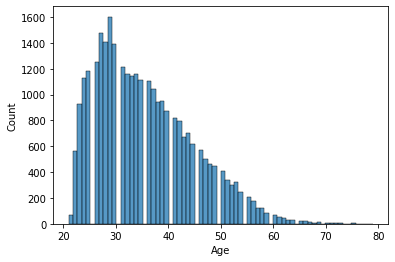

In [ ]:
# visualizing the Age column for better understanding with histplot
sns.histplot(df['Age'])

From this hist plot we can divide age into 9 bins

In [ ]:
# we are using Bining in Age column
df['Age_group'] = pd.cut(df.Age, bins=[21,25,30,35,40,45,50,55,60,80],labels=['21-25','26-30','31-35','36-40','41-45','46-50','51-55','56-60','61 and Above'])

In [ ]:
# droping Age column
df.drop(columns=['Age'],inplace=True)

# Feature Engineering on Repayments status Columns

In [ ]:
# creating a new data frame of Repayments status
repayment_df = df[['Repayment_September','Repayment_August','Repayment_July','Repayment_June','Repayment_May','Repayment_April']]

In [ ]:
#value counts of all Repayments status Columns 
for i in repayment_df.columns:
  print('column name = ', i)
  print(repayment_df[i].value_counts())

column name =  Repayment_September
 0    14737
-1     5682
 1     3667
-2     2750
 2     2666
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: Repayment_September, dtype: int64
column name =  Repayment_August
 0    15730
-1     6046
 2     3926
-2     3752
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: Repayment_August, dtype: int64
column name =  Repayment_July
 0    15764
-1     5934
-2     4055
 2     3819
 3      240
 4       75
 7       27
 6       23
 5       21
 1        4
 8        3
Name: Repayment_July, dtype: int64
column name =  Repayment_June
 0    16455
-1     5683
-2     4318
 2     3159
 3      180
 4       68
 7       58
 5       35
 6        5
 8        2
 1        2
Name: Repayment_June, dtype: int64
column name =  Repayment_May
 0    16947
-1     5535
-2     4516
 2     2626
 3      178
 4       83
 7       58
 5       17
 6        4
 8        1
Name: Repayment_May, dtype: int64
column name =  

In data description we have not given information about 0 and -2 values 

In [ ]:
# Value count percentage of Repayments status columns with respect of Defaulter
for i in repayment_df.columns:
  print('column name = ',i)
  print(df[repayment_df[i]<=0].Defaulter.value_counts(normalize=True))

column name =  Repayment_September
0    0.861625
1    0.138375
Name: Defaulter, dtype: float64
column name =  Repayment_August
0    0.837238
1    0.162762
Name: Defaulter, dtype: float64
column name =  Repayment_July
0    0.82802
1    0.17198
Name: Defaulter, dtype: float64
column name =  Repayment_June
0    0.820381
1    0.179619
Name: Defaulter, dtype: float64
column name =  Repayment_May
0    0.815468
1    0.184532
Name: Defaulter, dtype: float64
column name =  Repayment_April
0    0.813293
1    0.186707
Name: Defaulter, dtype: float64


In [ ]:
# Defining function for all Repayments status value less than 0 consider as 0
def repaymentsstatus(delay):
    if delay <= 0:
      return 0
    else:
      return delay

In [ ]:
# Apply function on Repayments status columns
for i in repayment_df.columns:
  df[i]=df[i].apply(repaymentsstatus)

In [ ]:
# Divide data from its basic feature 
cat_df = df[['Age_group','Gender','Education','Marital_status']]
repayment_df =df[['Repayment_September','Repayment_August','Repayment_July','Repayment_June','Repayment_May','Repayment_April']]
bills_df = df[['Sep_Bill','Aug_Bill', 'July_Bill', 'June_Bill', 'May_Bill', 'Apr_Bill']]
pay_df = df[['Pay_Sep','Pay_Aug', 'Pay_July', 'Pay_June', 'Pay_May', 'Pay_April']]

#<b> EDA 

#<b> Dependent Variable

In [ ]:
# value count 
df['Defaulter'].value_counts()

0    23335
1     6630
Name: Defaulter, dtype: int64

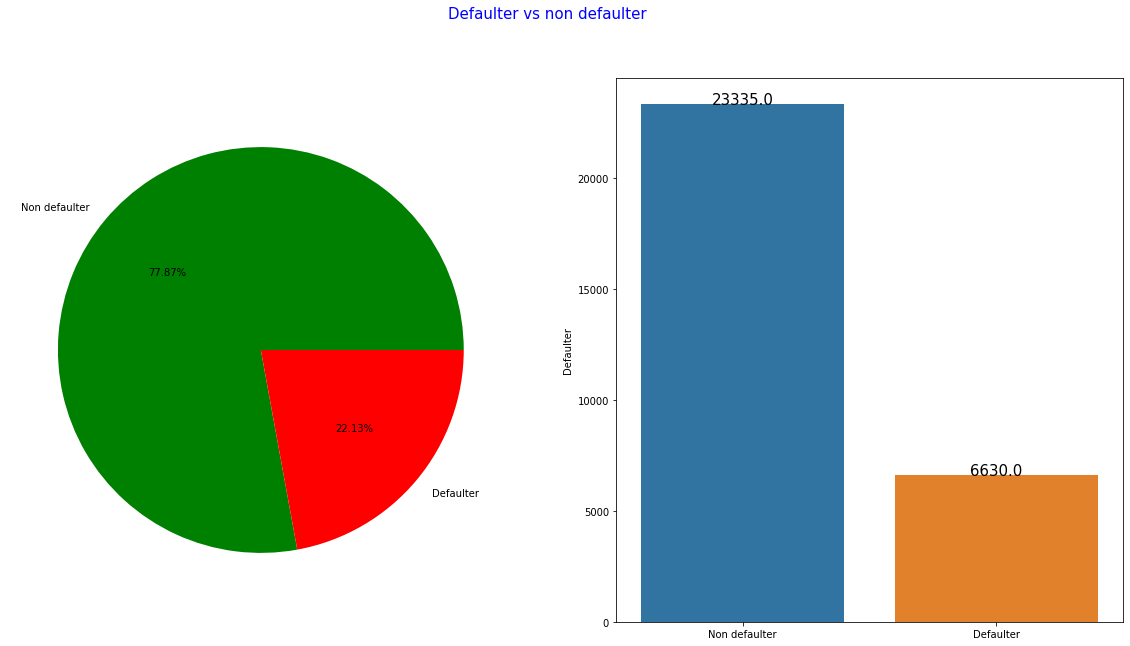

In [ ]:
# Pie plot
plt.figure(figsize=(20,10))
plt.suptitle("Defaulter vs non defaulter",fontsize=15,color='blue')
plt.subplot(1,2,1)
plt.pie(df['Defaulter'].value_counts(),labels=['Non defaulter','Defaulter'],autopct='%0.2f%%',colors=['green','red'])
plt.subplot(1,2,2)
ax=sns.barplot(['Non defaulter','Defaulter'],df['Defaulter'].value_counts())
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.25,rect.get_height(),horizontalalignment='center', fontsize = 15)

plt.show()

<b>22 % of the customers are Defaulters and rest are non defaulters, we observed data is imblanaced 

#<b> Categorical DataFrame

In [ ]:
# viewing first 5 rows of Catogerical data frame
cat_df.head()

Age_group  Gender   Education Marital_status
0     21-25  Female  university        married
1     26-30  Female  university         single
2     31-35  Female  university         single
3     36-40  Female  university        married
4     56-60    Male  university        married

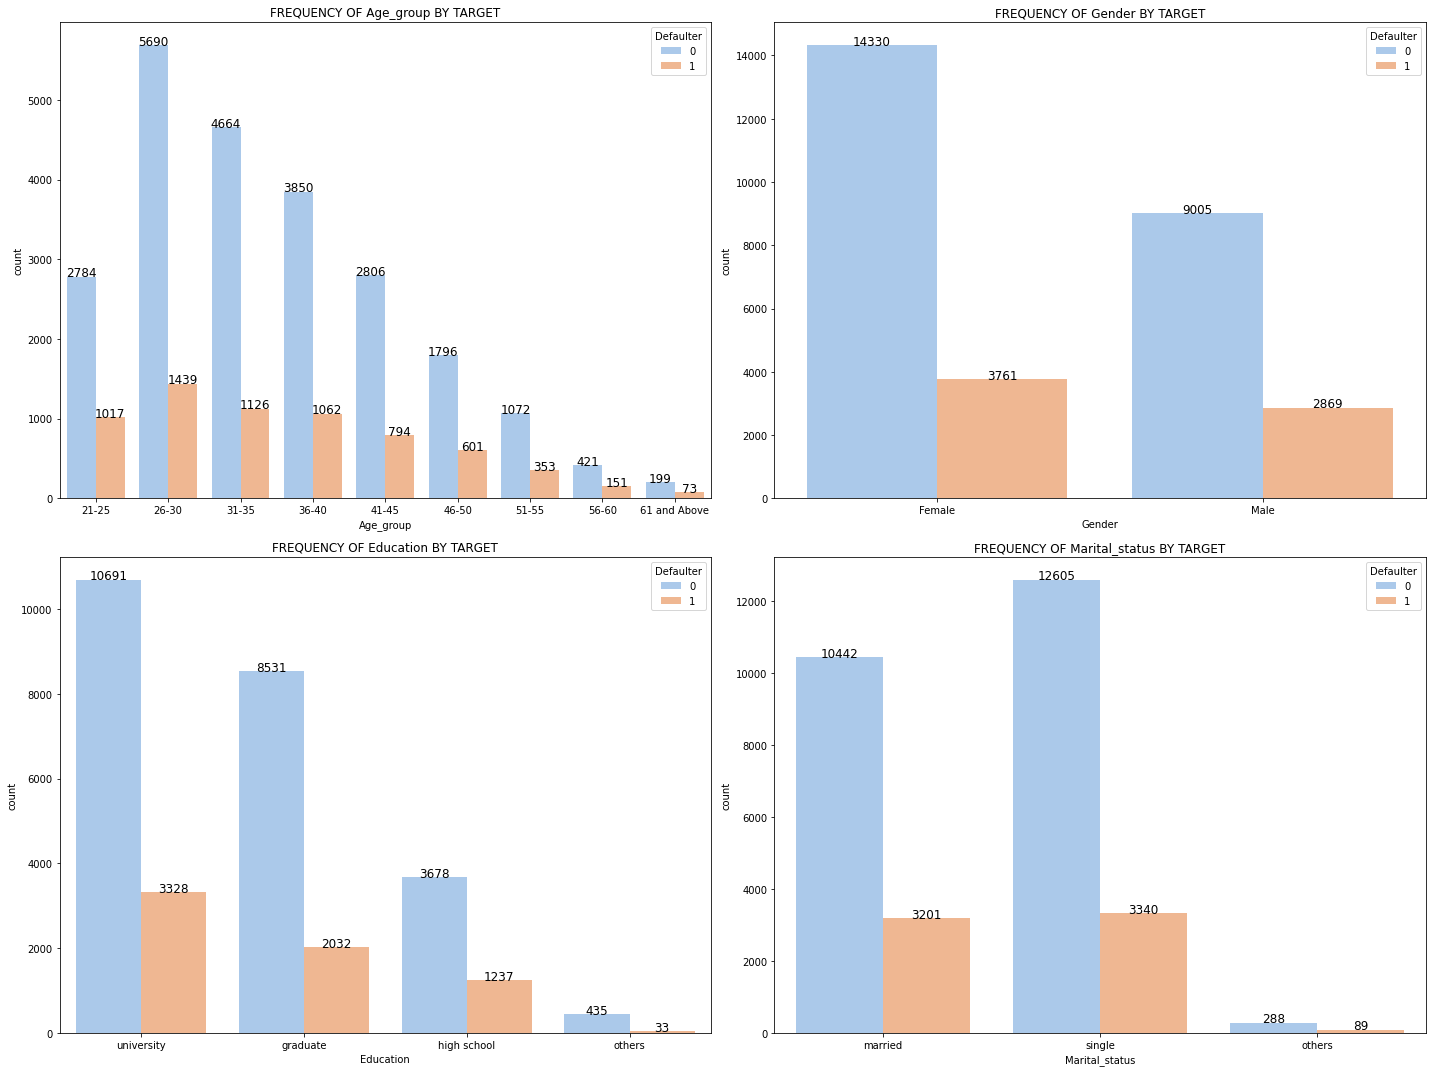

In [ ]:
# FREQUENCY OF categorical feature by TARGET
n = 1
plt.figure(figsize=(20,15))
for i in cat_df.columns:
  plt.subplot(2,2,n)
  n=n+1
  ax = sns.countplot(cat_df[i], hue=df["Defaulter"],palette='pastel')
  
  plt.title(f'FREQUENCY OF {i} BY TARGET')
  plt.tight_layout()
  for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.25,rect.get_height(),horizontalalignment='center', fontsize = 12)

<b> This is the visualized comparision of Defaulters and non defaulters with respect to catogerical features.
and we observe that the ratio of defaulters and non defaulters are following same trend on all the categorical features

Text(0.5, 1.0, 'Male')

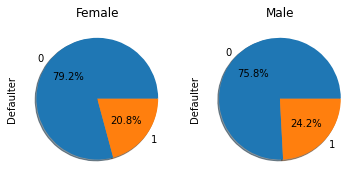

In [ ]:
# Percentage of Defaulters with respect to Gender
plt.subplot(1, 2, 1)
df[df['Gender']=='Female'].Defaulter.value_counts().plot.pie(autopct='%1.1f%%', shadow=True,)
plt.title('Female')
plt.subplot(1, 2, 2)
df[df['Gender']=='Male'].Defaulter.value_counts().plot.pie(autopct='%1.1f%%', shadow=True,)
plt.title('Male')

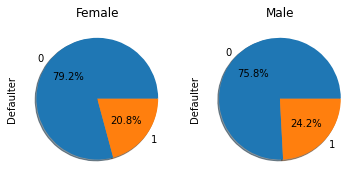

In [ ]:
j=1
for i in list(np.unique(df['Gender'])):
  plt.subplot(1, 2, j)
  j+=1
  df[df['Gender']==i].Defaulter.value_counts().plot.pie(autopct='%1.1f%%', shadow=True,)
  plt.title(i)

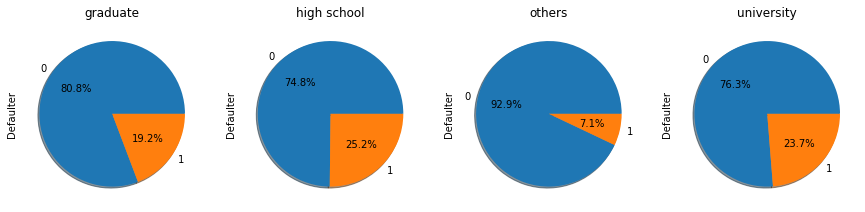

In [ ]:
plt.figure(figsize=(15,40))
j=1
for i in list(np.unique(df['Education'])):
  plt.subplot(1,4, j)
  j+=1
  df[df['Education']==i].Defaulter.value_counts().plot.pie(autopct='%1.1f%%', shadow=True,)
  plt.title(i)
plt.show()

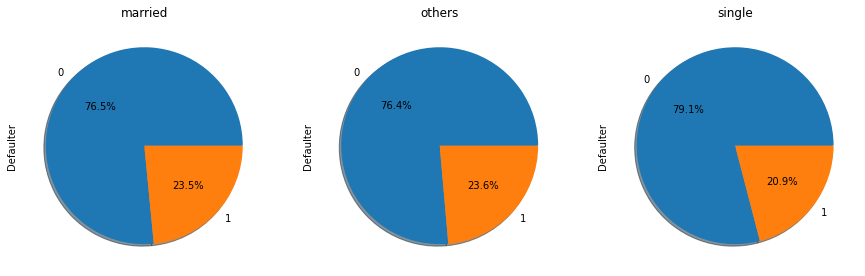

In [ ]:
plt.figure(figsize=(15,40))
j=1
for i in list(np.unique(df['Marital_status'])):
  plt.subplot(1,3, j)
  j+=1
  df[df['Marital_status']==i].Defaulter.value_counts().plot.pie(autopct='%1.1f%%', shadow=True,)
  plt.title(i)
plt.show()

<b> Men have slightly higher chance of being a defaulter than women 

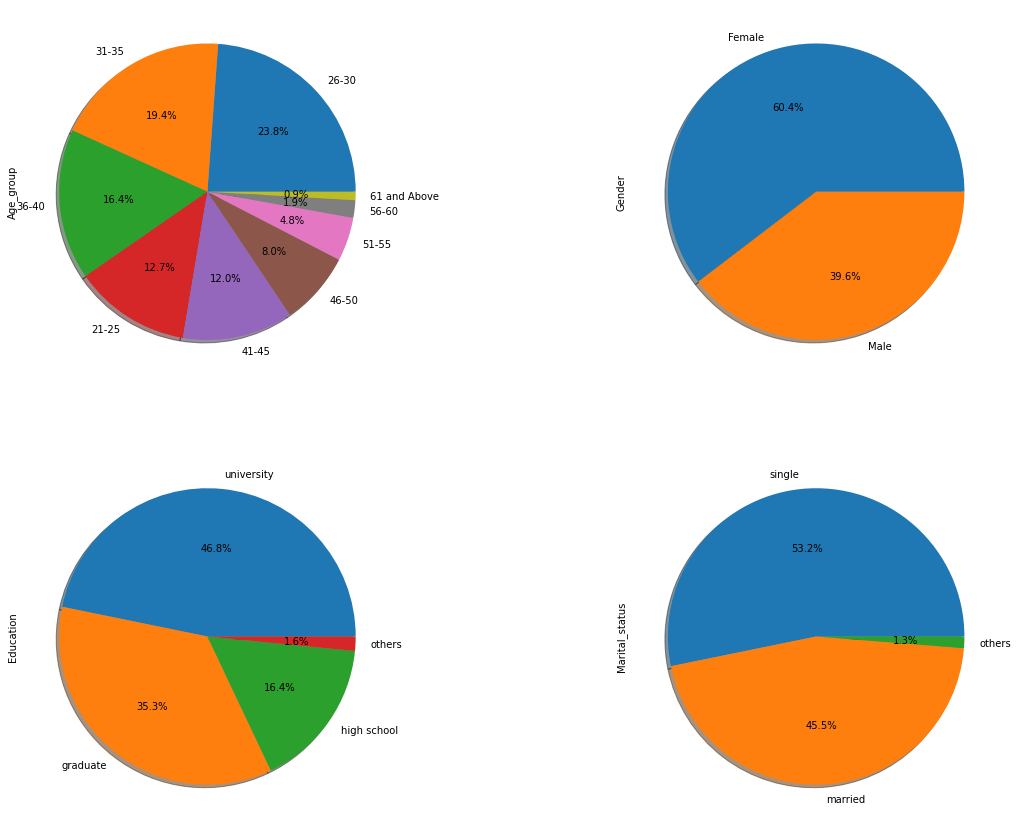

In [ ]:
# percentage of value count in each column
n = 1
plt.figure(figsize=(20,15))
for i in cat_df.columns:
  plt.subplot(2,2,n)
  n=n+1
  ax = cat_df[i].value_counts().plot.pie(autopct='%1.1f%%', shadow=True,)

<b> The complete catogerical data set has been analysed individually with repsect to their sub categories .

#<b> Repayment Dataframe

In [ ]:
repayment_df.head()

Repayment_September  Repayment_August  ...  Repayment_May  Repayment_April
0                    2                 2  ...              0                0
1                    0                 2  ...              0                2
2                    0                 0  ...              0                0
3                    0                 0  ...              0                0
4                    0                 0  ...              0                0

[5 rows x 6 columns]

In [ ]:
# Describe repayment df
repayment_df.describe()

Repayment_September  Repayment_August  ...  Repayment_May  Repayment_April
count         29965.000000      29965.000000  ...   29965.000000     29965.000000
mean              0.356416          0.320340  ...       0.221625         0.226698
std               0.760752          0.802064  ...       0.717768         0.715483
min               0.000000          0.000000  ...       0.000000         0.000000
25%               0.000000          0.000000  ...       0.000000         0.000000
50%               0.000000          0.000000  ...       0.000000         0.000000
75%               0.000000          0.000000  ...       0.000000         0.000000
max               8.000000          8.000000  ...       8.000000         8.000000

[8 rows x 6 columns]

In [ ]:
# Considering repayment more 3 months delay as one subcategory. 
for i in repayment_df.columns:
  repayment_df[i] = repayment_df[i].apply(lambda x:3 if x>=3 else x)

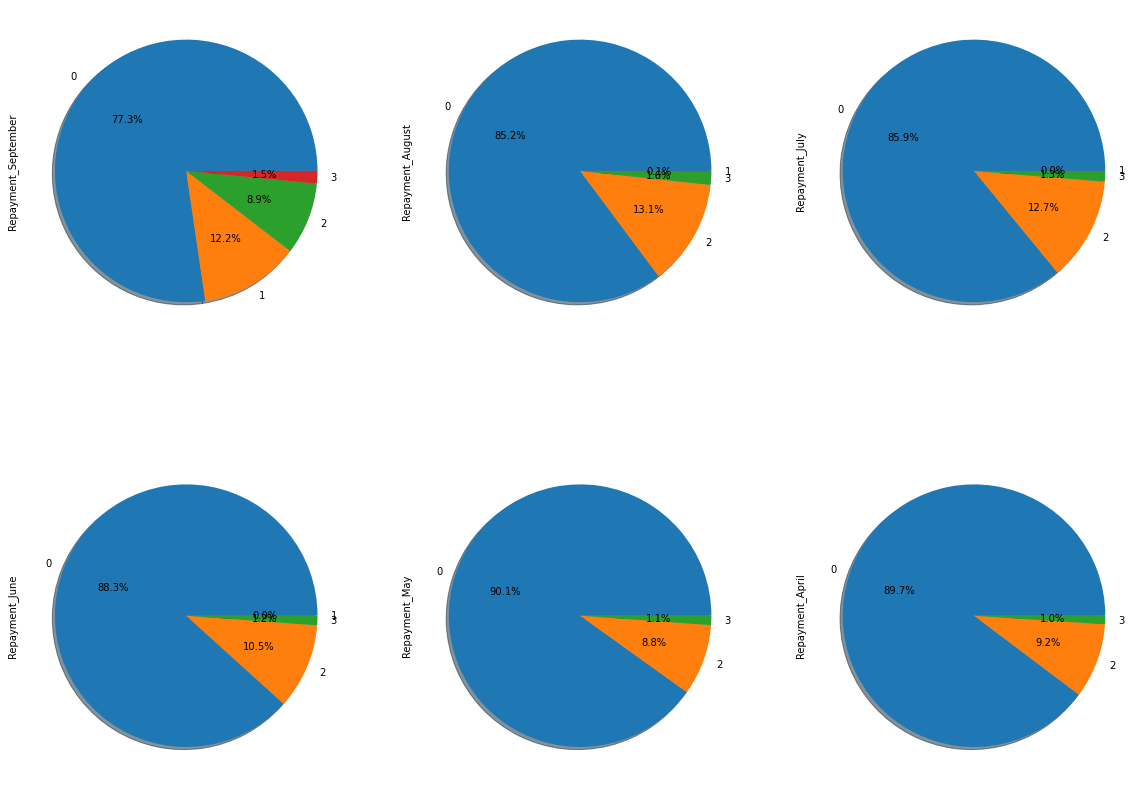

In [ ]:
# percentage of value count in each column
n = 1
plt.figure(figsize=(20,15))
for i in repayment_df.columns:
  plt.subplot(2,3,n)
  n=n+1
  ax = repayment_df[i].value_counts().plot.pie(autopct='%1.1f%%', shadow=True,)

<b> Most of the customers pay duly in each months 

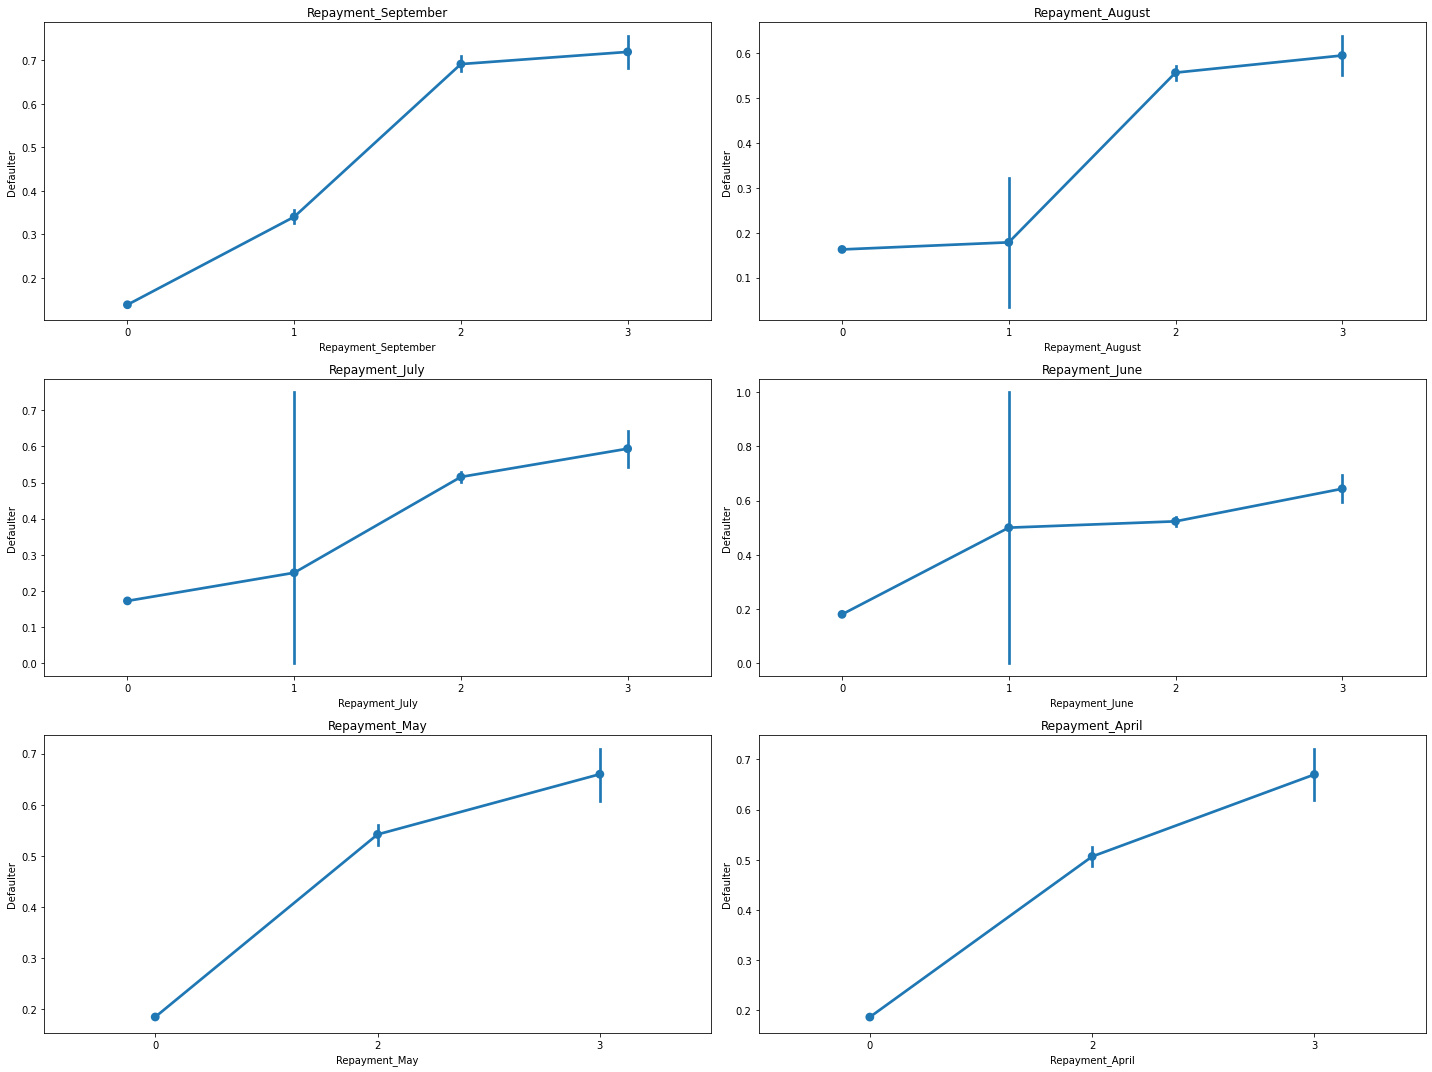

In [ ]:
# plt pointplot
n = 1
plt.figure(figsize=(20,15))
for i in repayment_df.columns:
  plt.subplot(3,2,n)
  n=n+1
  sns.pointplot(repayment_df[i],df['Defaulter'])
  plt.title(i)
  plt.tight_layout()

<b> The probabilty of customer being Defaulter is directly proportional to delay in repayment

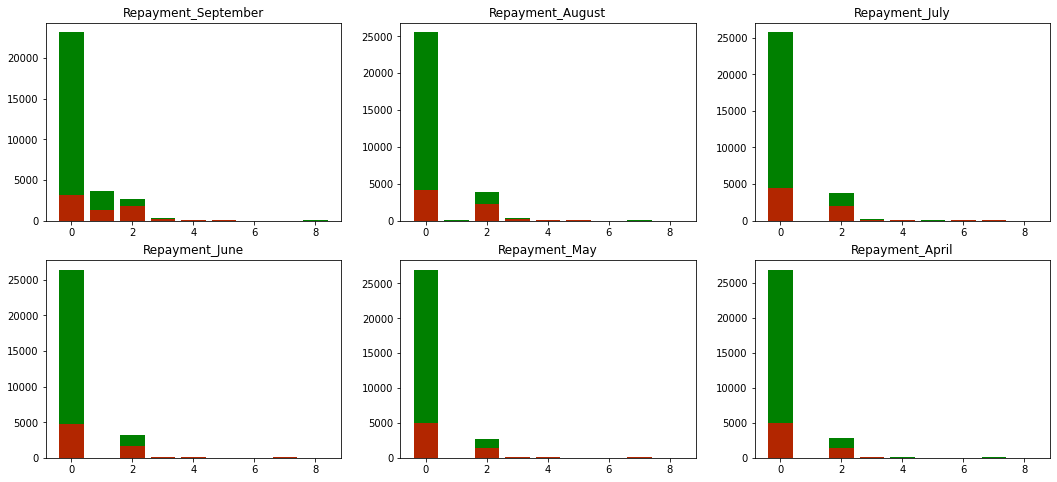

In [ ]:
pay_status_columns = repayment_df.columns
figure, ax = plt.subplots(2,3)
figure.set_size_inches(18,8)
for i in range(len(pay_status_columns)):
    row,col = int(i/3), i%3
    d  = df[pay_status_columns[i]].value_counts()
    x = df[pay_status_columns[i]][(df['Defaulter']==1)].value_counts()
    ax[row,col].bar(d.index, d, align='center', color='green')
    ax[row,col].bar(x.index, x, align='center', color='red', alpha=0.7)
    ax[row,col].set_title(pay_status_columns[i])    
plt.show()

<b> When Customers are pay duly then the count of defaulter is low 

#<b> Bills DataFrame 

In [ ]:
bills_df.head()

Sep_Bill  Aug_Bill  July_Bill  June_Bill  May_Bill  Apr_Bill
0      3913      3102        689          0         0         0
1      2682      1725       2682       3272      3455      3261
2     29239     14027      13559      14331     14948     15549
3     46990     48233      49291      28314     28959     29547
4      8617      5670      35835      20940     19146     19131

In [ ]:
bills_df.describe()

Sep_Bill       Aug_Bill  ...       May_Bill       Apr_Bill
count   29965.000000   29965.000000  ...   29965.000000   29965.000000
mean    51283.009778   49236.366294  ...   40358.334390   38917.012281
std     73658.132403   71195.567392  ...   60817.130623   59574.147742
min   -165580.000000  -69777.000000  ...  -81334.000000 -339603.000000
25%      3595.000000    3010.000000  ...    1787.000000    1262.000000
50%     22438.000000   21295.000000  ...   18130.000000   17124.000000
75%     67260.000000   64109.000000  ...   50247.000000   49252.000000
max    964511.000000  983931.000000  ...  927171.000000  961664.000000

[8 rows x 6 columns]

In [ ]:
# maximum billing in each month
max_bill = []
for i in bills_df.columns:
  max = bills_df[i].max()
  max_bill.append(max)

print(max_bill)

[964511, 983931, 1664089, 891586, 927171, 961664]


In [ ]:
# maximum billing in each month
min_bill = []
for i in bills_df.columns:
  min = bills_df[i].min()
  min_bill.append(min)

print(min_bill)

[-165580, -69777, -157264, -170000, -81334, -339603]


In [ ]:
# Average bill in each Month
avg_bill = []
for i in bills_df.columns:
  avg = bills_df[i].mean()
  avg_bill.append(avg)

print(avg_bill)

[51283.00977807442, 49236.36629400968, 47067.91606874687, 43313.32988486568, 40358.33439012181, 38917.012280994495]


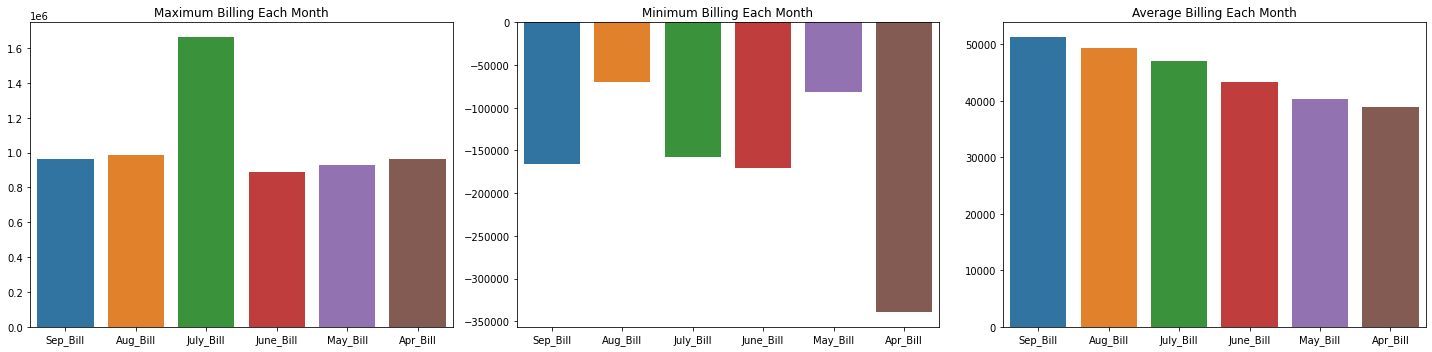

In [ ]:
# visualization of maximum, minimum & Average billing each month
fig,axes = plt.subplots(1,3,figsize=(20,5))
sns.barplot(bills_df.columns, max_bill,ax=axes[0]).set_title("Maximum Billing Each Month")
sns.barplot(bills_df.columns, min_bill,ax=axes[1]).set_title("Minimum Billing Each Month")
sns.barplot(bills_df.columns,list(df[i].mean() for i in bills_df.columns),ax=axes[2]).set_title("Average Billing Each Month")
plt.tight_layout()

In [ ]:
# sns.pairplot(df, vars=bills_df.columns, kind='scatter',hue='Defaulter')

In [ ]:
pay_df.head()

Pay_Sep  Pay_Aug  Pay_July  Pay_June  Pay_May  Pay_April
0        0      689         0         0        0          0
1        0     1000      1000      1000        0       2000
2     1518     1500      1000      1000     1000       5000
3     2000     2019      1200      1100     1069       1000
4     2000    36681     10000      9000      689        679

In [ ]:
df.head()

Limit_bal  Gender   Education  ... Pay_April  Defaulter  Age_group
0      20000  Female  university  ...         0          1      21-25
1     120000  Female  university  ...      2000          1      26-30
2      90000  Female  university  ...      5000          0      31-35
3      50000  Female  university  ...      1000          0      36-40
4      50000    Male  university  ...       679          0      56-60

[5 rows x 24 columns]

In [ ]:
df[df['Repayment_April']==0].Defaulter.value_counts(normalize=True)

0    0.813293
1    0.186707
Name: Defaulter, dtype: float64

In [ ]:
# Using One hot encoding on categorical features and storing in new data frame
new_df = pd.get_dummies(df,drop_first=True)

In [ ]:
new_df.head()

Limit_bal  Repayment_September  ...  Age_group_56-60  Age_group_61 and Above
0      20000                    2  ...                0                       0
1     120000                    0  ...                0                       0
2      90000                    0  ...                0                       0
3      50000                    0  ...                0                       0
4      50000                    0  ...                1                       0

[5 rows x 34 columns]

In [ ]:
# split our data frame to dependent and independent features
X =new_df.drop(columns=['Defaulter'])
y =new_df['Defaulter']

In [ ]:
X.shape

(29965, 33)

In [ ]:
#importing SMote to make our dataset balanced
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X,y)

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 29965
Resampled dataset shape 46670


In [ ]:
# train test spilt data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote,test_size=0.2,random_state=0)

In [ ]:
#Scaling
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PowerTransformer
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#<b> Optimization
##Before moving onto performance metrics, let’s discuss optimization. What metric exactly are we optimizing? In this case, we are optimizing recall.

##Ideally, we do not want to allow any defaults to fall through the cracks, so our optimal model will minimize False Negatives (So RecallScore is as high as possible).

In [ ]:
#Creating empty list for storing metrices scores
train_accuracy_sco = []
test_accuracy_sco  = [] 
train_precision_sco = []
test_precision_sco =[]
train_recall_sco  = []
test_recall_sco  = []
train_f1_sco = []
test_f1_sco = []
train_roc_sco =[]
test_roc_sco =[]

In [ ]:
# Defining the function (without Cv and Hyperparameter tuning)
def matrix2(x_train,x_test,y_train,y_true):
  Log = LogisticRegression()
  SGD = SGDClassifier()
  svc = SVC()
  KNN = KNeighborsClassifier()
  DSTree = DecisionTreeClassifier()
  RFC = RandomForestClassifier()
  GBC = GradientBoostingClassifier()
  XGBC = XGBClassifier(silent=True)

  models = [Log, SGD, svc, KNN, DSTree, RFC, GBC, XGBC]

  for i in models:
    i.fit(x_train,y_train)
    train_pred = i.predict(x_train)
    test_pred = i.predict(x_test)

    # accuracy score
    train_accuracy = accuracy_score(y_train,train_pred)
    test_accuracy = accuracy_score(y_true,test_pred)
    
    # Precision score
    train_precision = precision_score(y_train,train_pred)
    test_precision = precision_score(y_true,test_pred)
    
    #recall Score
    train_recall = recall_score(y_train,train_pred)
    test_recall = recall_score(y_true,test_pred)
    
    # F1 score
    train_f1 = f1_score(y_train,train_pred)
    test_f1 = f1_score(y_true,test_pred)
    
    # ROC_AUC Score
    train_roc = roc_auc_score(y_train,train_pred)
    test_roc = roc_auc_score(y_true,test_pred)
    

    train_accuracy_sco.append(train_accuracy)
    test_accuracy_sco.append(test_accuracy)
    train_precision_sco.append(train_precision)
    test_precision_sco.append(test_precision)
    train_recall_sco.append(train_recall)
    test_recall_sco.append(test_recall)
    train_f1_sco.append(train_f1)
    test_f1_sco.append(test_f1)
    train_roc_sco.append(train_roc)
    test_roc_sco.append(test_roc)
  

  
  scores = pd.DataFrame(list(zip(train_accuracy_sco,test_accuracy_sco,train_precision_sco,test_precision_sco,
                                 train_recall_sco,test_recall_sco,train_f1_sco,test_f1_sco,train_roc_sco,test_roc_sco )),
                        index=['Logistic Regression', 'SGD', 'svc', 'KNN', 'DSTree', 'RFC', 'GBC', 'XGBC'],
                        columns=['train_accuracy_sco','test_accuracy_sco','train_precision_sco','test_precision_sco',
                                 'train_recall_sco','test_recall_sco','train_f1_sco','test_f1_sco','train_roc_sco','test_roc_sco'])
  return scores
  

In [ ]:
#scores_1 = matrix2(X_train_scaled,X_test_scaled,y_train,y_test)

In [ ]:
#scores_1

#<b> Defining Function

In [ ]:
#Creating empty list for storing metrices scores
train_accuracy_score = []
test_accuracy_score  = [] 
train_precision_score = []
test_precision_score =[]
train_recall_score  = []
test_recall_score  = []
train_f1_score = []
test_f1_score = []
train_roc_score =[]
test_roc_score =[]

In [ ]:
#
def matrix(model,x_train,x_test,y_train,y_true, append_score = False, logistic = False):
  # fitting model
  model.fit(x_train,y_train)
  print('\n')
  print('='*30, 'Training score','='*30)
  training = model.score(x_train,y_train)
  print('\n')
  print('Training score  = ', training)
 
  print('\n')

  # if we are using grid search sc or random search cv printing best parameters and best score
  print('='*20, 'Best Parameters and Best score','='*20)
  try:
    print('best parameters  =  ', model.best_params_)
    print('Best score  =  ', model.best_score_)
  except:
    pass

  # predicting x_train
  train_pred = model.predict(x_train) 
  # predicting x_test
  test_pred = model.predict(x_test)
  print('\n')

  # printing all metrices scores on training set and test set
  print('='*30, 'Metrices scores on Train and Test Set','='*30)
  train_accuracy = accuracy_score(y_train,train_pred)
  test_accuracy = accuracy_score(y_true,test_pred)
  print('Train Accuracy score = ',train_accuracy)
  print('Test Accuracy score = ',test_accuracy)
  train_precision = precision_score(y_train,train_pred)
  test_precision = precision_score(y_true,test_pred)
  print('Train Precision score = ', train_precision)
  print('Test Precision score = ', test_precision)
  train_recall = recall_score(y_train,train_pred)
  test_recall = recall_score(y_true,test_pred)
  print('Train Recall score = ',train_recall)
  print('Test Recall score = ',test_recall)
  train_f1 = f1_score(y_train,train_pred)
  test_f1 = f1_score(y_true,test_pred)
  print('Train F1 score = ',train_f1) 
  print('Test F1 score = ',test_f1) 
  train_roc = roc_auc_score(y_train,train_pred)
  test_roc = roc_auc_score(y_true,test_pred)
  print('Train ROC_AUC score = ',train_roc) 
  print('Test ROC_AUC score = ',test_roc) 
  print('\n')

  # Classification Report on test set
  print('='*30, 'Classification Report on test set','='*30)
  target_names = ['class 0', 'class 1']
  print(classification_report(y_true, test_pred, target_names=target_names))
  print('\n')
  # Classification Report on train set
  print('='*30, 'Classification Report on train set','='*30)
  target_names = ['class 0', 'class 1']
  print(classification_report(y_train, train_pred, target_names=target_names))
  print('\n')

  # Graph of cofusion matrix on test set
  print('='*30, 'Confusion Matrix on test set','='*30)
  cf_matrix = confusion_matrix(y_true,test_pred)
  plt.title('Heatmap of confusion matrix on test set',fontsize=15)
  group_names = ['True Negative','False Positive','False Negative','True Positive']
  group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')
  plt.show()
  print('\n')

  # Graph of cofusion matrix
  print('='*30, 'Confusion Matrix on train set','='*30)
  cf_matrix = confusion_matrix(y_train,train_pred)
  plt.title('Heatmap of confusion matrix on train set',fontsize=15)
  group_names = ['True Negative','False Positive','False Negative','True Positive']
  group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')
  plt.show()
  print('\n')
  
  try:
  # logistc regression top 10 feature
    print('='*40, 'Top 10 Feature Importance','='*40)
    if logistic == True:
      top_10 = pd.DataFrame({'Features':X.columns, 'Importance':np.abs(model.best_estimator_.coef_).ravel() }).sort_values("Importance",ascending =False)[:10].reset_index(drop=True)
    # for other models top 10 features 
    else :
      top_10 = pd.DataFrame({'Features':X.columns, 'Importance':(model.best_estimator_.feature_importances_)}).sort_values("Importance",ascending =False)[:10].reset_index(drop=True)
    
    sns.set(rc={'figure.figsize':(15,10)})
    ax=sns.barplot(x=X.columns[:10],y=top_10['Importance'])
    plt.xticks(rotation=90)
    for index, row in top_10.iterrows():
      ax.text(row.name,row.Importance, round(row.Importance,4), color='red', ha="center")
    plt.show()
  except:
    pass

  #roc_auc Curve
  test_fpr, test_tpr, test_threshold = roc_curve(y_true, test_pred)
  train_fpr, train_tpr, train_threshold = roc_curve(y_train, train_pred)
  test_roc_auc = auc(test_fpr, test_tpr)
  train_roc_auc = auc(train_fpr, train_tpr)

  # method I: plt
  plt.title('Receiver Operating Characteristic curves')
  plt.plot(test_fpr, test_tpr, 'b', label = 'Test AUC = %0.2f' % test_roc_auc,color='red')
  plt.plot(train_fpr, train_tpr, 'b', label = 'Train AUC = %0.2f' % train_roc_auc,color='blue')
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()



  if append_score == True:
    train_accuracy_score.append(train_accuracy)
    test_accuracy_score.append(test_accuracy)
    train_precision_score.append(train_precision)
    test_precision_score.append(test_precision)
    train_recall_score.append(train_recall)
    test_recall_score.append(test_recall)
    train_f1_score.append(train_f1)
    test_f1_score.append(test_f1)
    train_roc_score.append(train_roc)
    test_roc_score.append(test_roc)

  else:
    pass
  
  return train_pred,test_pred



In [ ]:
def lime_explainibilty(model, num_features, instance):
  feature_names =list(X.columns)

  explainer = lime.lime_tabular.LimeTabularExplainer(X.values,feature_names=feature_names,mode='classification')

  choosen_instance = X.reset_index(drop=True).loc[[instance]].values[0]
  exp = explainer.explain_instance(choosen_instance, rf_random.best_estimator_.predict_proba, num_features=num_features)

  exp.show_in_notebook(show_table=True)

In [ ]:
def model_explainability_eli5(model,row_number) :
  return eli.show_prediction(model, np.array(X_test.iloc[row_number]),
                    feature_names=X.columns.values,
                    show_feature_values=True)

In [ ]:
def model_explainability_shap(model,for_instance):
  # Initialize JavaScript visualizations in notebook environment
  shap.initjs()
  # Define a tree explainer for the built model
  explainer = shap.TreeExplainer(model)
  # obtain shap values for the first row of the test data
  shap_values = explainer(X_test,check_additivity=False)
  # visualize the first prediction's explanation with a force plot
  return shap.plots.force(shap_values[for_instance])

##<b> Logistic Regression

In [ ]:
# importing Logistic regression
from sklearn.linear_model import LogisticRegression

In [ ]:
# Parameters for logistic regression
logistic_parameters = {'C': [0.001,0.01,0.1,1,10,100],
                       'penalty':['l1', 'l2', 'elasticnet','None'],
                       'class_weight':['dict','balanced'],
}

In [ ]:
# Using Grid Search for Hyperparameter Tuning
logistic_grid_search = GridSearchCV(LogisticRegression(),param_grid=logistic_parameters,cv=2,verbose=True,scoring='recall')

Fitting 2 folds for each of 48 candidates, totalling 96 fits


============================== Training score ==============================


Training score  =  0.7749049836732509


==================== Best Parameters and Best score ====================
best parameters  =   {'C': 100, 'class_weight': 'dict', 'penalty': 'l2'}
Best score  =   0.7736201663958965


============================== Metrices scores on Train and Test Set ==============================
Train Accuracy score =  0.8068887936575959
Test Accuracy score =  0.809620741375616
Train Precision score =  0.8280990790000572
Test Precision score =  0.8301583658480606
Train Recall score =  0.7749049836732509
Test Recall score =  0.7771809196390203
Train F1 score =  0.8006194347657761
Test F1 score =  0.802796581955388
Train ROC_AUC score =  0.806911082026923
Test ROC_AUC score =  0.809530630759681


============================== Classification Report on test set ==============================
              precision    recal

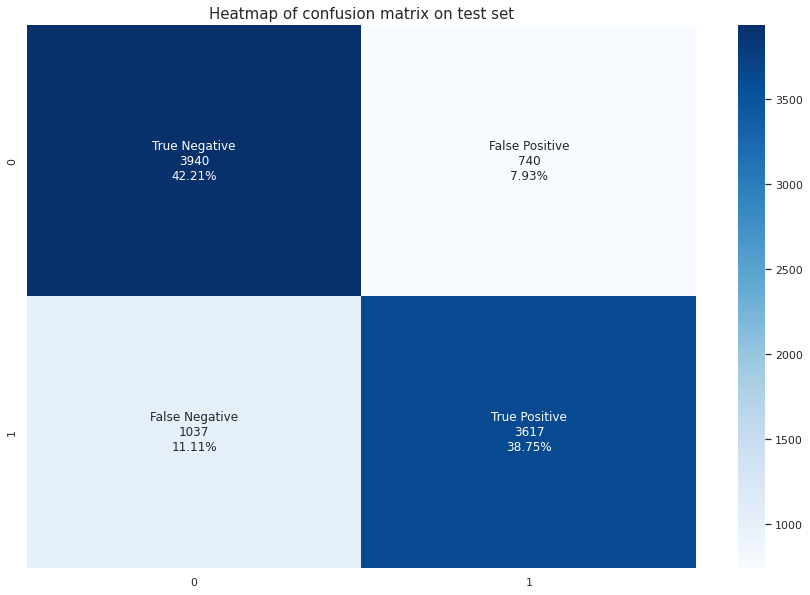



============================== Confusion Matrix on train set ==============================


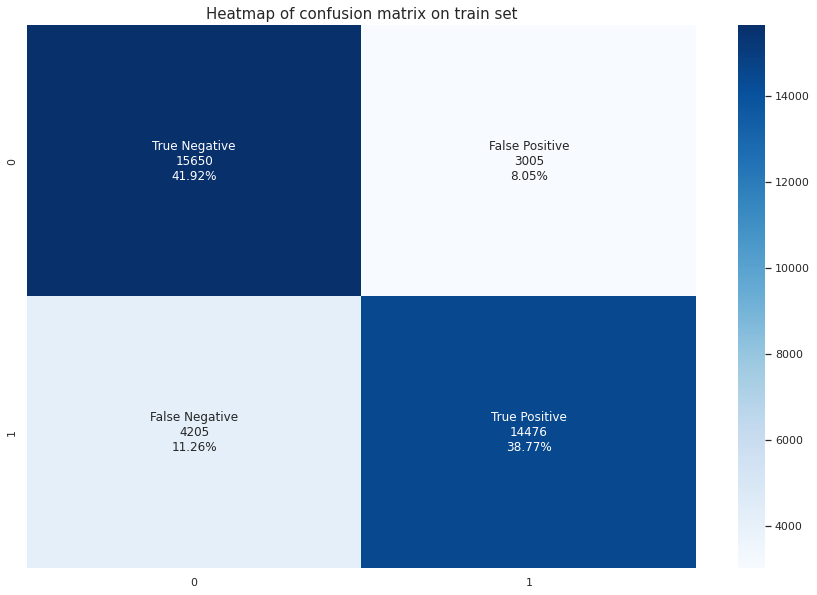



======================================== Top 10 Feature Importance ========================================


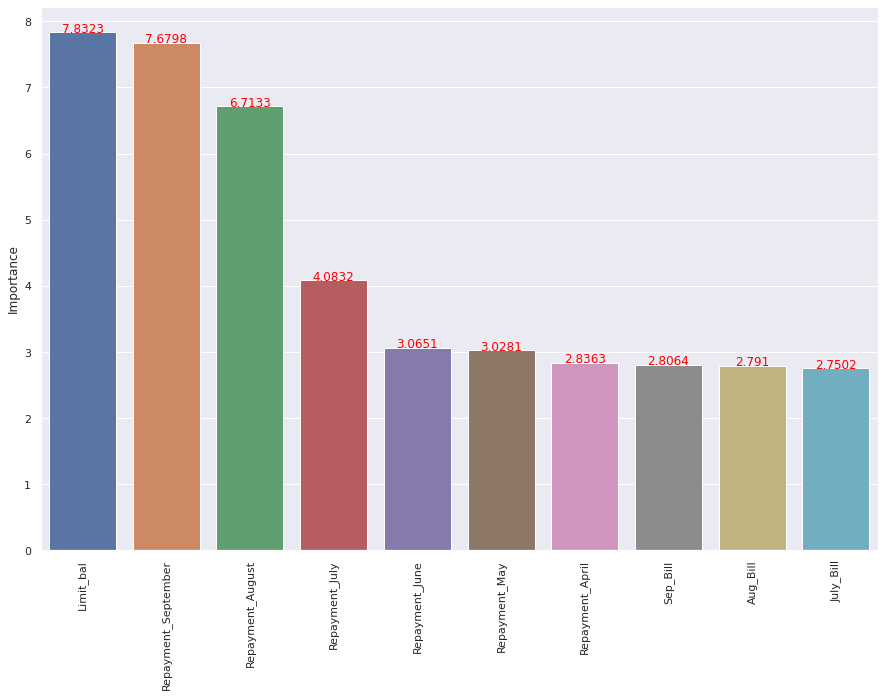

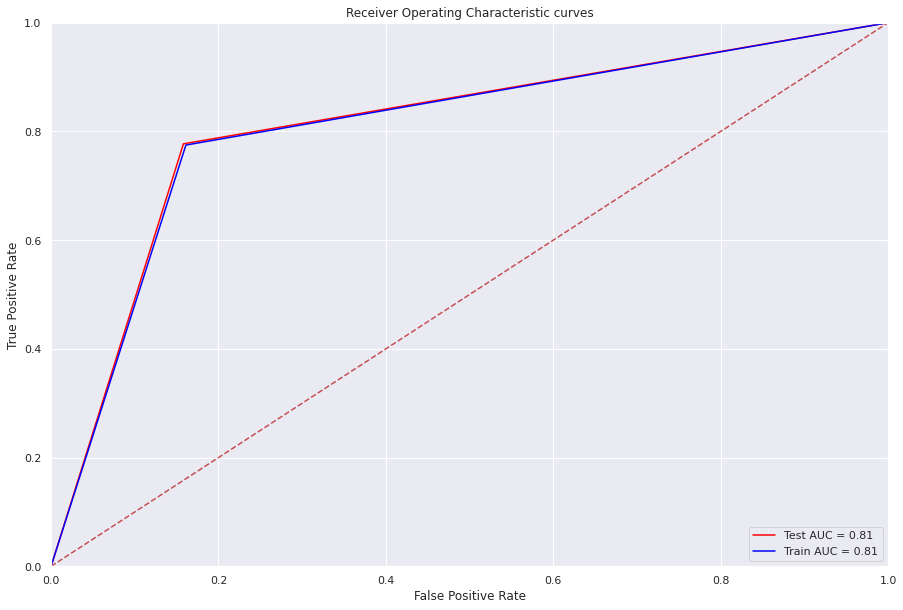

In [ ]:
# Fit and evalute model with the help of self define function
logistic_train_pred, logistic_test_pred = matrix(logistic_grid_search,X_train_scaled,X_test_scaled,y_train,y_test,logistic=True)

In [ ]:
print(logistic_train_pred,logistic_test_pred)

[1 1 0 ... 1 1 0] [1 0 0 ... 0 0 1]


In [ ]:
log = LogisticRegressionO()
log.fit(X_train_scaled, y_train)

test = pd.DataFrame(X_test_scaled)
lime_explainer = lime_tabular.LimeTabularExplainer(
      training_data = X_train_scaled,
      feature_names = X.columns.values,
      mode = 'classification',
      verbose=True,
      random_state =42 )

lime_exp = lime_explainer.explain_instance(
      data_row = X_test.iloc[1],
      predict_fn = log.predict,num_features=5,)
lime_exp.show_in_notebook(show_table=True,)

#<b> Stochastic Gradient Descent

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
# parameter
sgd_params  = {'penalty':['l2', 'l1', 'elasticnet'],
               'alpha':[0.01,0.001,0.0001],
               'max_iter':[1500],
               'class_weight':['dict','balanced']
    
}

In [ ]:
sgd_grid = GridSearchCV(SGDClassifier(),param_grid=sgd_params,cv=2,scoring='recall')



============================== Training score ==============================


Training score  =  0.7756008778973288


==================== Best Parameters and Best score ====================
best parameters  =   {'alpha': 0.0001, 'class_weight': 'balanced', 'max_iter': 1500, 'penalty': 'l1'}
Best score  =   0.7753860968899744


============================== Metrices scores on Train and Test Set ==============================
Train Accuracy score =  0.8016927362331262
Test Accuracy score =  0.8039425755303192
Train Precision score =  0.8185413253488504
Test Precision score =  0.8203266787658802
Train Recall score =  0.7756008778973288
Test Recall score =  0.7769660507090674
Train F1 score =  0.7964927711505689
Test F1 score =  0.7980578238799382
Train ROC_AUC score =  0.8017109187128028
Test ROC_AUC score =  0.8038676407391491


============================== Classification Report on test set ==============================
              precision    recall  f1-score   support

     

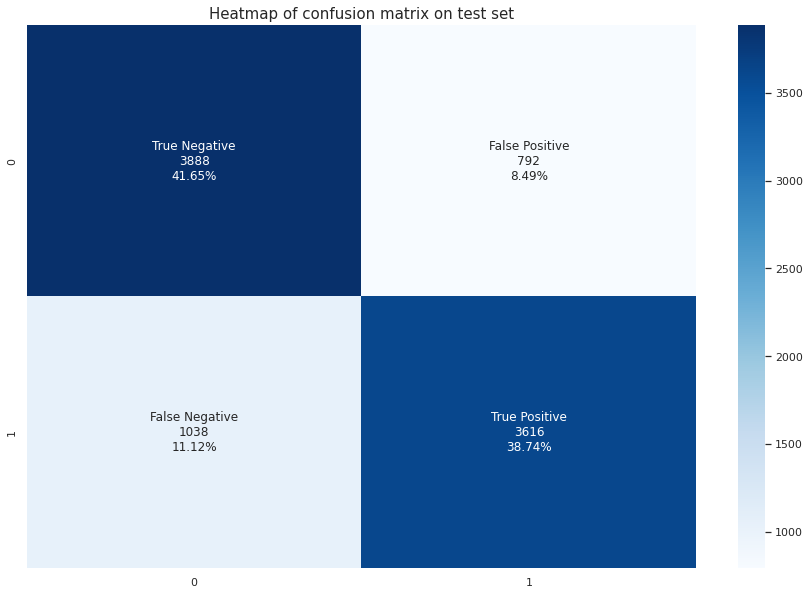



============================== Confusion Matrix on train set ==============================


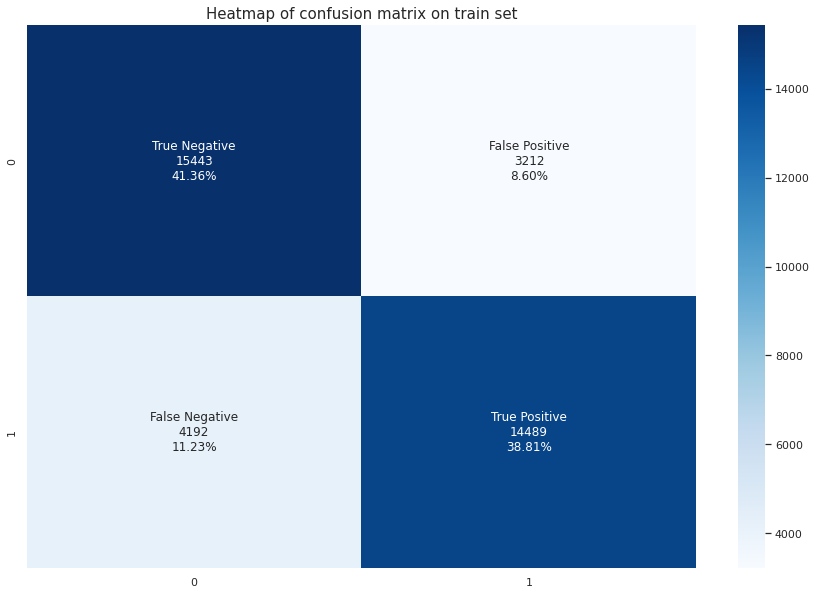



======================================== Top 10 Feature Importance ========================================


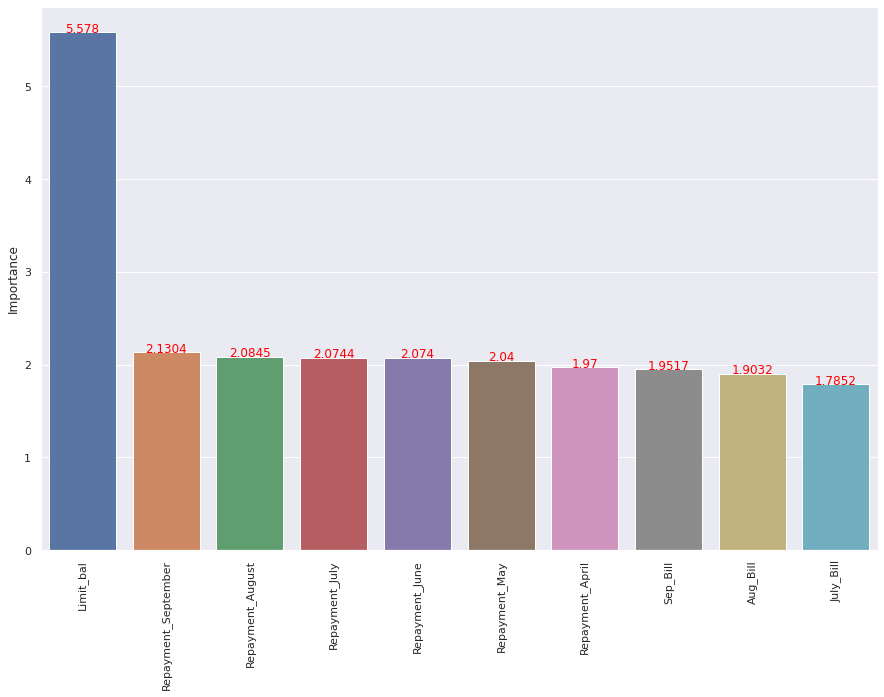

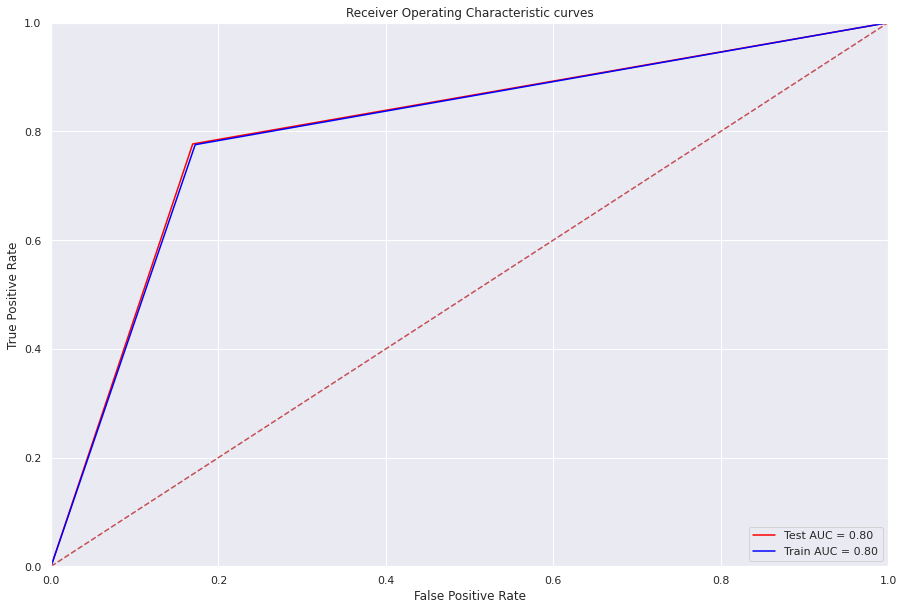

In [ ]:
sgd_train_pred, sgd_test_pred =  matrix(sgd_grid,X_train_scaled,X_test_scaled,y_train,y_test,logistic=True)

#<b> Support Vector Classifier

In [ ]:
from sklearn.svm import SVC 

In [ ]:
#
svc_params = {'C': range(5,10,15),
              'kernel':['linear', 'poly', 'rbf', 'sigmoid',],    
}

In [ ]:
svc_grid = GridSearchCV(SVC(),param_grid=svc_params,cv=2,)



============================== Training score ==============================


Training score  =  0.8236286693807585


==================== Best Parameters and Best score ====================
best parameters  =   {'C': 5, 'kernel': 'rbf'}
Best score  =   0.8135311763445467


============================== Metrices scores on Train and Test Set ==============================
Train Accuracy score =  0.8236286693807585
Test Accuracy score =  0.8149775016070281
Train Precision score =  0.8722304283604135
Test Precision score =  0.8610905502097211
Train Recall score =  0.7586317648948129
Test Recall score =  0.7498925655350236
Train F1 score =  0.8114747058318302
Test F1 score =  0.8016538417365338
Train ROC_AUC score =  0.8236739633908533
Test ROC_AUC score =  0.8147967101179392


============================== Classification Report on test set ==============================
              precision    recall  f1-score   support

     class 0       0.78      0.88      0.83      4680
     c

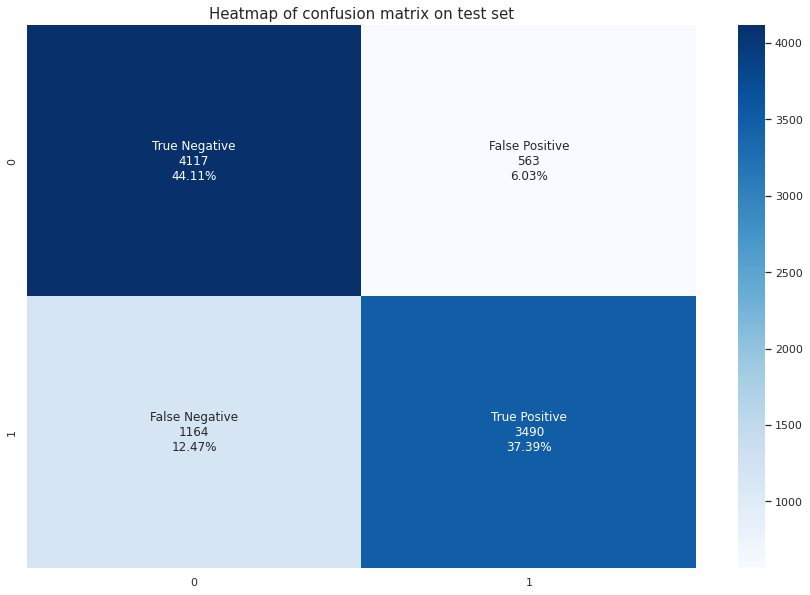



============================== Confusion Matrix on train set ==============================


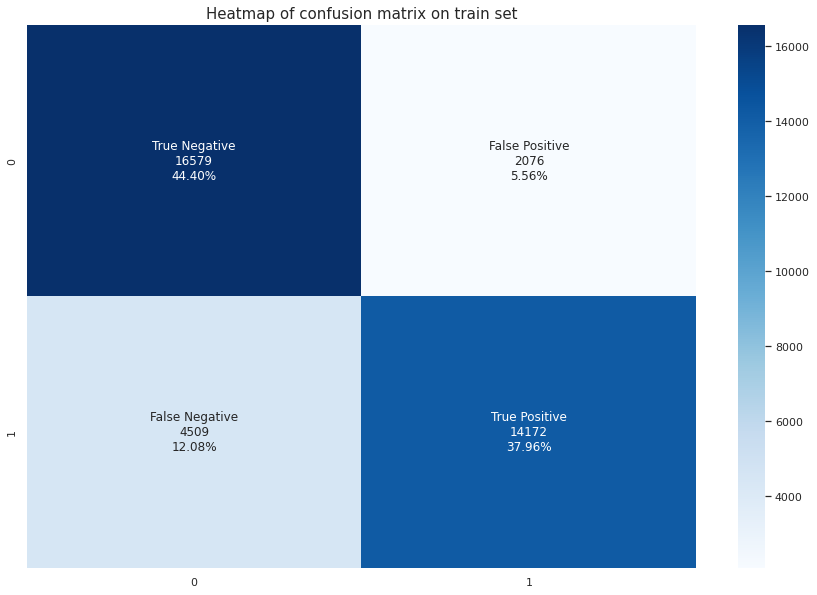



======================================== Top 10 Feature Importance ========================================


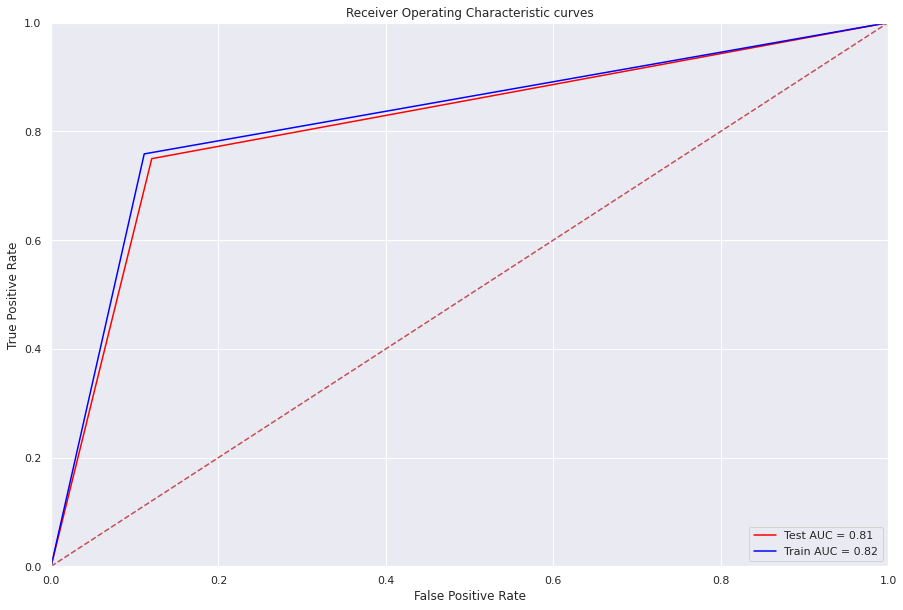

In [ ]:
svc_train_pred, svc_test_pred = matrix(svc_grid,X_train_scaled,X_test_scaled,y_train,y_test,logistic=True)

#<b>K Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [ ]:
knn_grid = GridSearchCV(KNeighborsClassifier(),param_grid=knn_params,cv=2,verbose=True)

Fitting 2 folds for each of 36 candidates, totalling 72 fits


============================== Training score ==============================


Training score  =  0.9985001071352047


==================== Best Parameters and Best score ====================
best parameters  =   {'metric': 'minkowski', 'n_neighbors': 15, 'weights': 'distance'}
Best score  =   0.8190486393829013


============================== Metrices scores on Train and Test Set ==============================
Train Accuracy score =  0.9985001071352047
Test Accuracy score =  0.8283694021855582
Train Precision score =  0.998661311914324
Test Precision score =  0.8511274735388863
Train Recall score =  0.9983405599271987
Test Recall score =  0.794800171895144
Train F1 score =  0.9985009101616876
Test F1 score =  0.8220000000000001
Train ROC_AUC score =  0.9985002183179279
Test ROC_AUC score =  0.8282761543236403


============================== Classification Report on test set ==============================
              pr

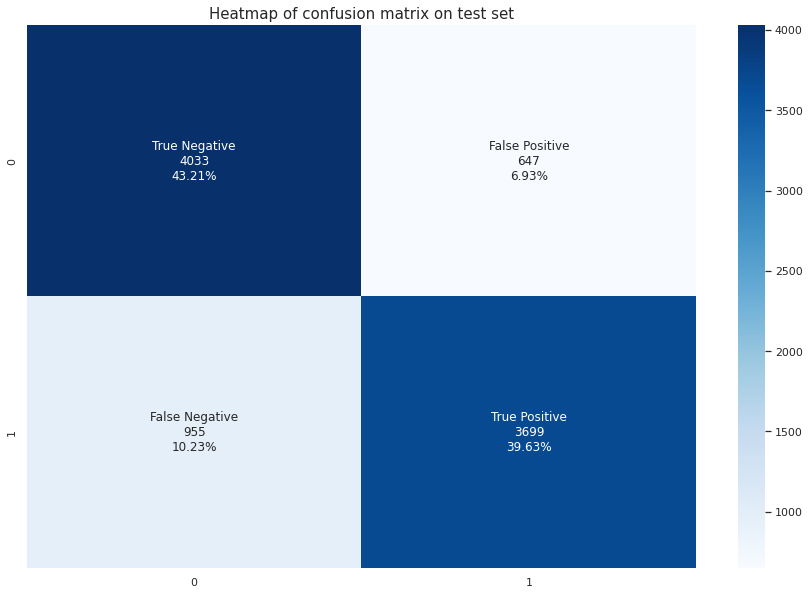



============================== Confusion Matrix on train set ==============================


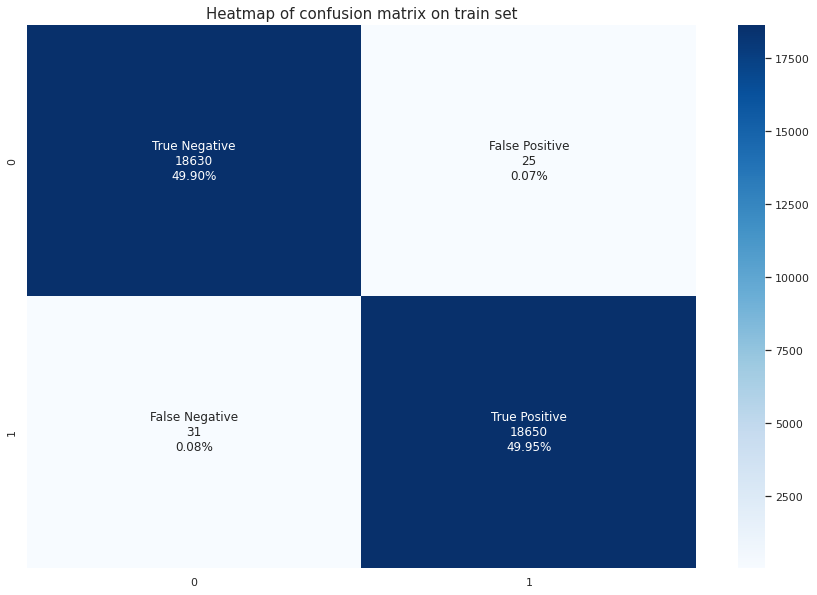



======================================== Top 10 Feature Importance ========================================


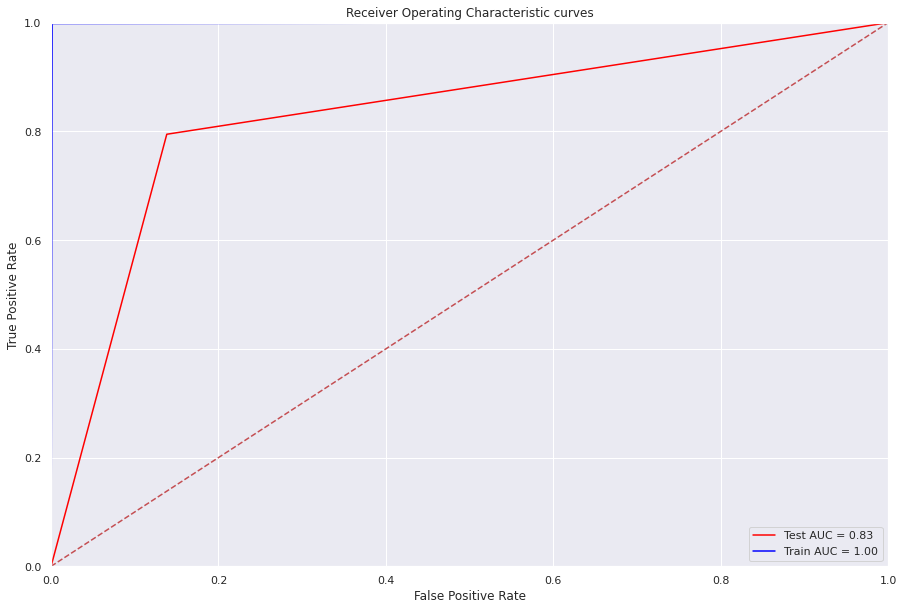

In [ ]:
knn_train_pred, knn_test_pred = matrix(knn_grid,X_train_scaled,X_test_scaled,y_train,y_test)

#<b> Decision Tree

In [ ]:
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Para
d_tree_params = {
    'max_depth': [10,],#2, 3, 5, 10, 20],
    'min_samples_leaf': [100,],#5, 10, 20, 50, 100],
    'criterion': ["entropy",],#"gini", ]
}

In [ ]:
dtree_grid = GridSearchCV(DecisionTreeClassifier(),param_grid=d_tree_params,cv=2,verbose=True)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


============================== Training score ==============================


Training score  =  0.8155935290336405


==================== Best Parameters and Best score ====================
best parameters  =   {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 100}
Best score  =   0.8005410327833726


============================== Metrices scores on Train and Test Set ==============================
Train Accuracy score =  0.8155935290336405
Test Accuracy score =  0.811870580672809
Train Precision score =  0.8343158372066659
Test Precision score =  0.8309730470534491
Train Recall score =  0.7879128526310155
Test Recall score =  0.7816931671680275
Train F1 score =  0.8104506786333727
Test F1 score =  0.8055801594331268
Train ROC_AUC score =  0.8156128187036075
Test ROC_AUC score =  0.8117867545241848


============================== Classification Report on test set ==============================
              pr

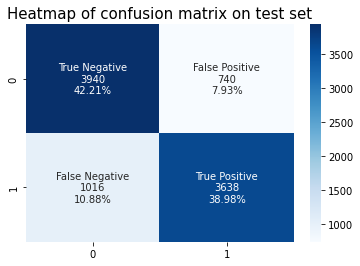



============================== Confusion Matrix on train set ==============================


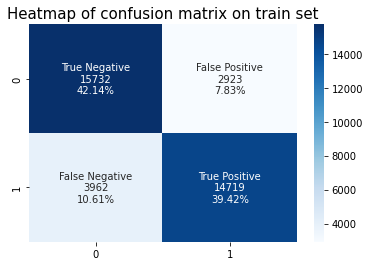



======================================== Top 10 Feature Importance ========================================


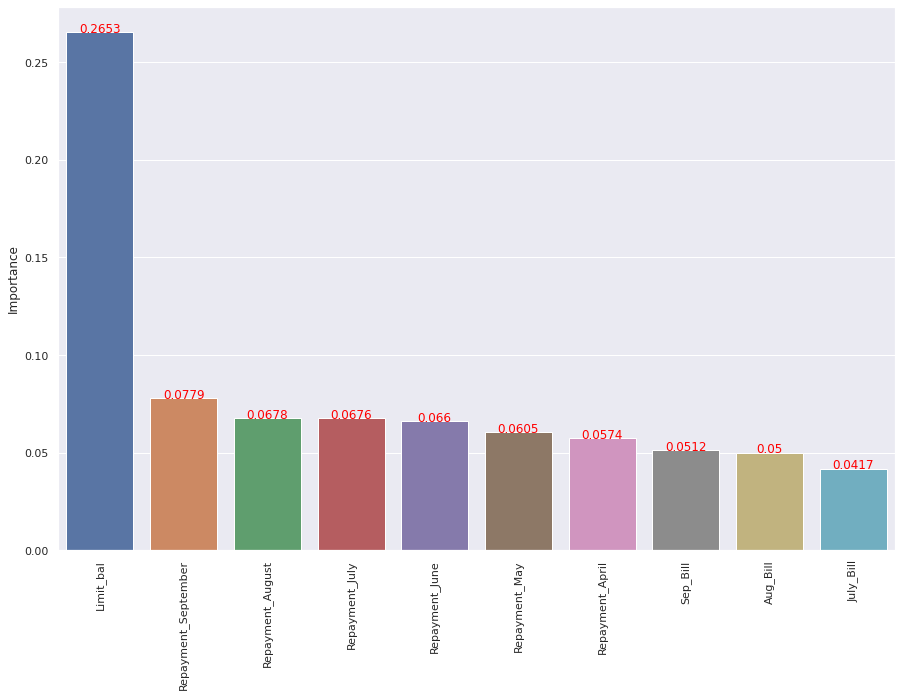

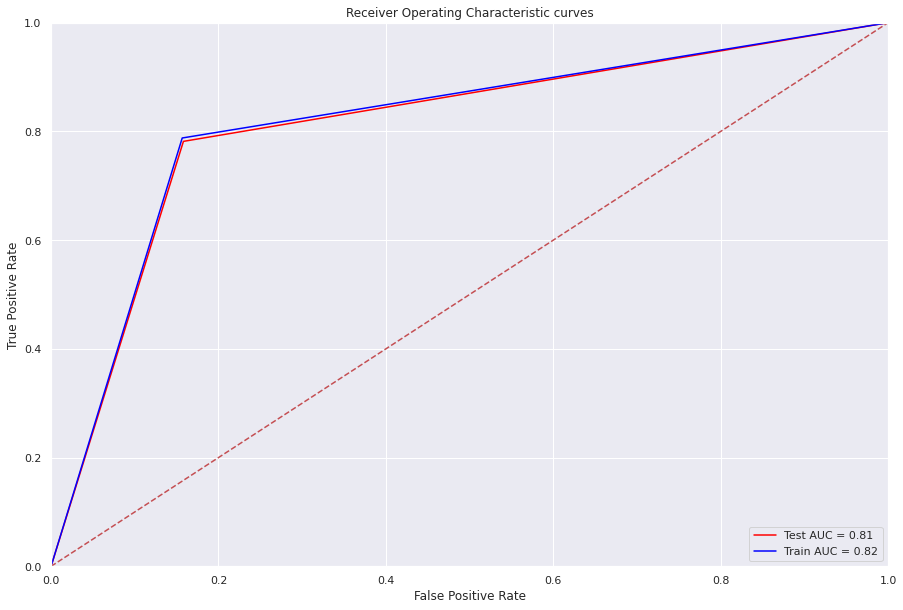

In [ ]:
dstree_train_pred, dstree_test_pred = matrix(dtree_grid,X_train_scaled,X_test_scaled,y_train,y_test)

In [ ]:
# # Visualizing Decision Tree Regressor
viz = dtreeviz(dtree_grid.best_estimator_,X_train_scaled,y_train, # Passing the model which is best in grid search and pass X_train and y_train
               target_name ='Rented Bike Count', #Dependent variable
               feature_names=X_train.columns, # Taking column names from X_train data frame 
               )
viz

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


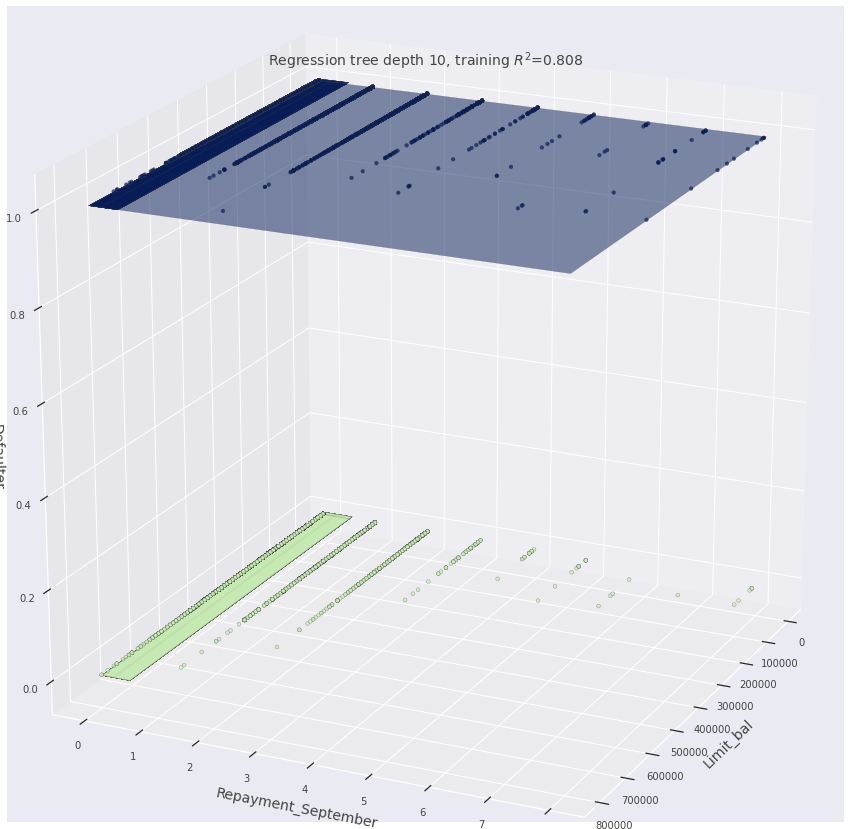

In [ ]:
#import for 3D graph
from mpl_toolkits.mplot3d import Axes3D
from dtreeviz.trees import *
# ploting the graph
figsize = (15,15)
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111, projection='3d')

t = rtreeviz_bivar_3D(dtree_grid.best_estimator_,
                      X_train, y_train,
                      feature_names=X.columns,
                      target_name='Defaulter',
                      fontsize=14,
                      elev=20,
                      azim=25,
                      dist=8.2,
                      show={'splits','title'},
                      ax=ax)
plt.show()

#<b> Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_params = {'n_estimators':[200],
             'criterion':['gini'],
              'min_samples_leaf':[8],
              'max_depth' : [50],
              'min_samples_split': [10],
              'max_features':['sqrt',]
              }

In [ ]:
rf_random = GridSearchCV(RandomForestClassifier(),rf_params,cv=2,scoring='recall',verbose=True)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


============================== Training score ==============================


Training score  =  0.8559498956158664


==================== Best Parameters and Best score ====================
best parameters  =   {'criterion': 'gini', 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 10, 'n_estimators': 200}
Best score  =   0.7896791951487387


============================== Metrices scores on Train and Test Set ==============================
Train Accuracy score =  0.8895436040282837
Test Accuracy score =  0.8395114634668952
Train Precision score =  0.9177523962578201
Test Precision score =  0.867489520260829
Train Recall score =  0.8559498956158664
Test Recall score =  0.800386764073915
Train F1 score =  0.8857744294261024
Test F1 score =  0.8325882878855612
Train ROC_AUC score =  0.8895670142780485
Test ROC_AUC score =  0.8394027837463591


============================== Classification Re

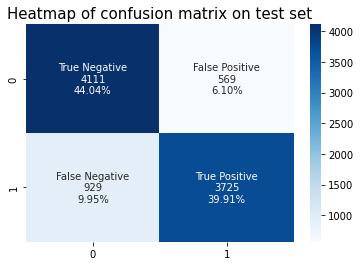



============================== Confusion Matrix on train set ==============================


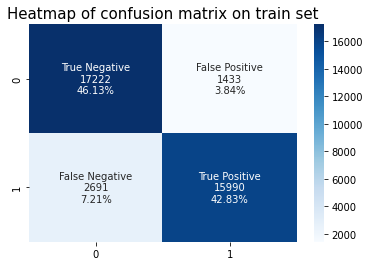



======================================== Top 10 Feature Importance ========================================


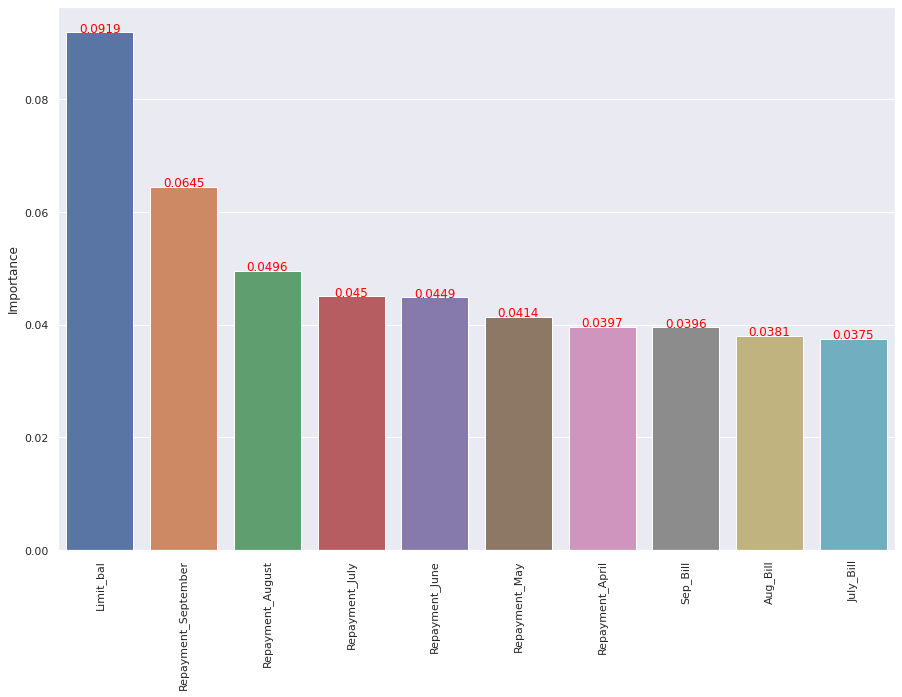

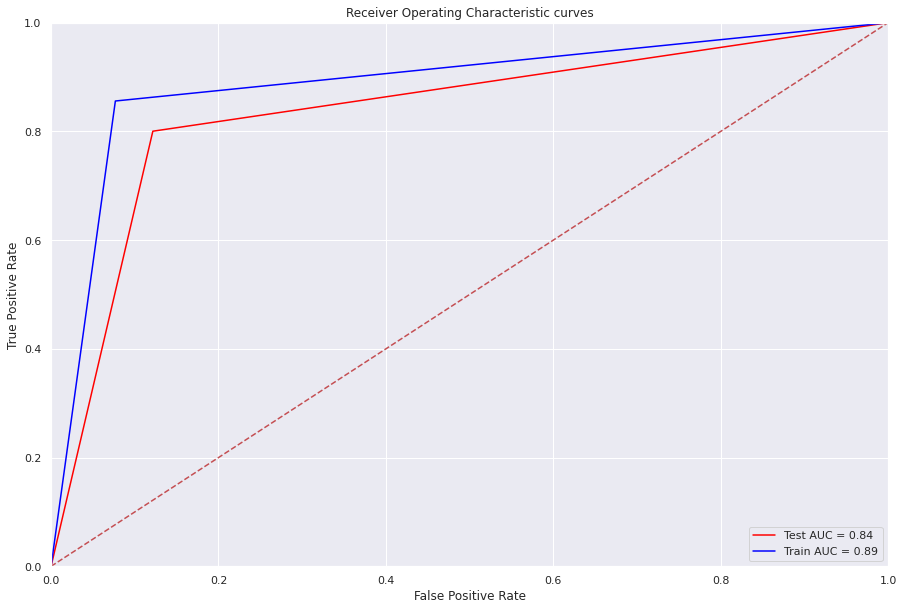

In [ ]:
rf_train_pred, rf_test_pred = matrix(rf_random,X_train_scaled,X_test_scaled,y_train,y_test)

In [ ]:
lime_explainibilty(rf_random.best_estimator_, 8,1)

In [ ]:
model_explainability_eli5(rf_random.best_estimator_,1)

In [ ]:
# model_explainability_shap(rf_random.best_estimator_,1)

##<b> Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# parameters for Gradient Boosting 
gb_params={'loss':['deviance', 'exponential'],
            # 'min_impurity_decrease':[0.4,0.2,0.6],
            'criterion':['mse','mae'],
            'n_estimators':[800,600,400,], 
            'learning_rate': [0.01,0.03,0.1,0.05], 
            'min_samples_leaf':[6,4,8],
            'max_depth':[25,15,20,30],
            # 'subsample':[0.7,0.5,1.0],
            # 'max_leaf_nodes':[17,15,10,20],
            'max_features':['auto','sqrt', 'log2'] 
            }

In [ ]:
gb_random = RandomizedSearchCV(GradientBoostingClassifier(),gb_params,scoring='recall',verbose=True,cv=2)

In [ ]:
gb_grid = GridSearchCV(GradientBoostingClassifier(),gb_params,cv=2,scoring='recall',verbose=True)

In [ ]:
gb_train_pred, gb_test_pred matrix(gb_random,X_train_scaled,X_test_scaled,y_train,y_test)

##<b> Extreme Gradient Boosting

In [ ]:
!pip install xgboost

In [ ]:
#importing Extreme Gradient Boosting Regressor
from xgboost import XGBRegressor

In [ ]:
xgb_params = {
          'subsample': [0.5],#0.3,0.7], 
          'n_thread': [4], #2,6],
          'n_estimators': [1000],#range(200,1500,50), 
          'min_child_weight': [2],#3,5], 
          'max_depth': [4],#range(2,8,2), 
          'learning_rate': [0.02],#0.04,0.06], 
          'eval_mertric': ['rmse'],#'mse',], 
          'colsample_bytree': [0.7],#0.5,1.0],  
          }
# After finding the best parameters, we commented on all the other parameters for faster execution

In [ ]:
xgb_grid_search= GridSearchCV(XGBRegressor(silent=True),param_grid=xgb_params,cv=2)

In [ ]:
xgb_train_pred, xgb_test_pred = matrix(xgb_grid_search,X_train_scaled,X_test_scaled,y_train,y_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

def fit_and_score(x_train,x_test,y_train,y_test):
  log = LogisticRegression()
  knn =KNeighborsClassifier()
  svc = SVC()
  gauss = GaussianNB()
  tree = DecisionTreeClassifier()
  forest = RandomForestClassifier()
  ada_boost = AdaBoostClassifier()
  gradient =GradientBoostingClassifier()
  xgboost = XGBClassifier()
  model = [log,knn,svc,gauss,tree,forest,ada_boost,gradient,xgboost]
  train_accuracy = []
  test_accuracy = []
  
  Precision_score = []
  Recall_score = []
  F1_score = []


  for i in model:
    i.fit(x_train,y_train)
    train_score.append(i.score(x_train,y_train))
    pred = i.predict(x_test)
    test_score.append(accuracy_score(y_test,pred))
    Precision_score.append(precision_score(y_test,pred))
    Recall_score.append(recall_score(y_test,pred))
    F1_score.append(f1_score(y_test,pred))

  scores= pd.DataFrame(list(zip(train_score,test_score,Precision_score,Recall_score,F1_score)),index=['Logistic','KNeighbors','SVC Linear','SVC rbf','GaussianNB','Xg boost'],columns=['Train_score','Test_score','Precision','Recall','F1'])
  return scores
